In [1]:
using RDatasets
using CSV, DataFrames
using MLLabelUtils
using Plots
using Evolutive
using Random
using Clustering
using LinearAlgebra
using Statistics

Generamos datos aleatorios

In [2]:
# Generar la matriz de 500x3 con valores aleatorios en el intervalo [a, b]
data = rand(400, 5)

400×5 Matrix{Float64}:
 0.591924   0.699436   0.650016   0.37762   0.392885
 0.475131   0.341687   0.0277703  0.312754  0.274074
 0.642169   0.644546   0.358427   0.952929  0.636563
 0.26279    0.612798   0.513405   0.340819  0.176343
 0.30938    0.247361   0.751748   0.309053  0.0797289
 0.94922    0.0753996  0.63827    0.184315  0.322939
 0.978355   0.879173   0.711324   0.855997  0.42272
 0.227235   0.964026   0.0289292  0.478498  0.993043
 0.924966   0.291707   0.914259   0.762751  0.904839
 0.025986   0.945431   0.439077   0.718394  0.170971
 ⋮                                          
 0.500322   0.282984   0.501789   0.448331  0.828539
 0.859624   0.598148   0.642441   0.137369  0.623877
 0.75497    0.971777   0.368445   0.500839  0.218636
 0.75762    0.247786   0.380466   0.548561  0.961928
 0.434375   0.246554   0.518963   0.935181  0.325947
 0.779405   0.130617   0.746167   0.129328  0.838512
 0.0919162  0.328374   0.670367   0.129128  0.819474
 0.880698   0.573035   0.721182

Realizamos un GKA con estos parametros guardando el mejor individuo de cada generacion

In [3]:
K = 10
popsize = 50
max_gen = 300
p = 0.15
clusters_GKA = GeneticKMeans(data, K, popsize, max_gen, p)

300-element Vector{Vector{Int64}}:
 [2, 4, 3, 6, 9, 2, 3, 8, 5, 7  …  6, 4, 2, 6, 8, 9, 4, 4, 5, 6]
 [4, 8, 9, 6, 3, 10, 4, 1, 10, 6  …  5, 10, 10, 4, 9, 6, 10, 5, 4, 8]
 [4, 8, 9, 6, 3, 10, 4, 1, 10, 6  …  5, 10, 10, 4, 9, 2, 10, 5, 4, 8]
 [4, 8, 9, 6, 3, 10, 4, 1, 9, 6  …  5, 10, 10, 4, 9, 2, 10, 5, 4, 8]
 [8, 10, 6, 2, 9, 10, 8, 5, 4, 3  …  2, 4, 4, 8, 4, 9, 4, 1, 8, 10]
 [10, 6, 9, 7, 3, 6, 4, 2, 4, 8  …  7, 5, 10, 10, 1, 9, 5, 5, 4, 6]
 [9, 3, 8, 3, 1, 10, 8, 7, 2, 5  …  3, 10, 9, 8, 10, 1, 10, 6, 8, 3]
 [9, 3, 8, 3, 1, 10, 8, 7, 2, 5  …  3, 10, 9, 8, 10, 1, 10, 6, 8, 3]
 [9, 3, 8, 3, 1, 10, 8, 7, 2, 5  …  3, 10, 9, 8, 10, 1, 10, 6, 8, 3]
 [9, 3, 8, 3, 1, 10, 8, 7, 2, 5  …  3, 6, 9, 8, 10, 1, 10, 6, 8, 3]
 ⋮
 [4, 6, 8, 3, 7, 4, 8, 10, 5, 3  …  6, 5, 4, 8, 5, 7, 1, 1, 8, 6]
 [4, 6, 8, 3, 7, 4, 8, 10, 5, 3  …  6, 5, 4, 8, 5, 7, 1, 1, 8, 6]
 [4, 6, 8, 3, 7, 4, 8, 10, 5, 3  …  6, 5, 4, 8, 5, 7, 1, 1, 8, 6]
 [4, 6, 8, 3, 7, 4, 8, 10, 5, 3  …  6, 5, 4, 8, 5, 7, 1, 1, 8, 6]
 [4, 6, 8, 3,

Realizamos K-Means tantas veces como generaciones en GKA y nos guardamos el clustering hecho en cada iteracion

In [4]:
clusters_KMeans = Vector{Vector{Int64}}([])
for i in 1:max_gen
    result = kmeans(data', K)

    push!(clusters_KMeans, result.assignments)
end

Ahora vamos a graficar como va cambiando el promedio de ambos y su mejor cluster hasta la generacion/iteracion i-esima, todo esto en relacion al SSE

In [5]:
# primero calculo el SSE de cada generacion/iteracion
sse_KMeans = []
sse_GKA = []
for i in 1:max_gen
    centroids_KMeans = centroides(data, clusters_KMeans[i], K)
    push!(sse_KMeans,calculate_sse(data, centroids_KMeans, clusters_KMeans[i]))
    centroids_GKA = centroides(data, clusters_GKA[i], K)
    push!(sse_GKA,calculate_sse(data, centroids_GKA, clusters_GKA[i]))
end

In [11]:
average_KMeans = []
best_KMeans = []
average_GKA = []
best_GKA = []
for i in 1:max_gen
    push!(average_KMeans,mean(sse_KMeans[1:i]))
    push!(best_KMeans,minimum(sse_KMeans[1:i]))
    push!(average_GKA,mean(sse_GKA[1:i]))
    push!(best_GKA,minimum(sse_GKA[1:i]))
end

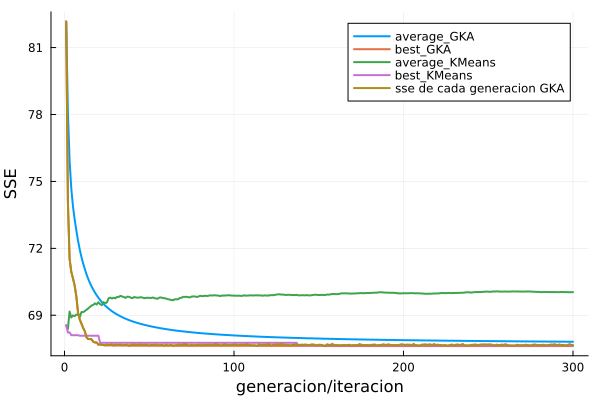

In [14]:
# Graficamos los valores
plot(1:max_gen, average_GKA, xlabel = "generacion/iteracion", ylabel = "SSE", label="average_GKA", lw=2)
plot!(best_GKA, label="best_GKA", lw=2)
plot!(average_KMeans, label="average_KMeans", lw=2)
plot!(best_KMeans, label="best_KMeans", lw=2)
plot!(sse_GKA, label="sse de cada generacion GKA", lw=2)

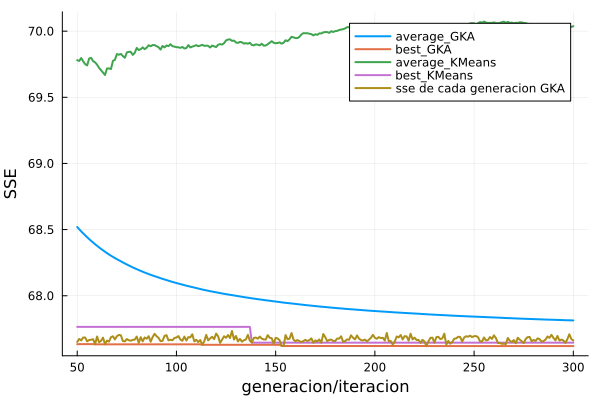

In [15]:
# Veamos como se comporta el grafico mas en detalle
rango = 50:max_gen
plot(rango, average_GKA[rango], xlabel = "generacion/iteracion", ylabel = "SSE", label="average_GKA", lw=2, legend =:topright)
plot!(rango, best_GKA[rango], label="best_GKA", lw=2)
plot!(rango, average_KMeans[rango], label="average_KMeans", lw=2)
plot!(rango, best_KMeans[rango], label="best_KMeans", lw=2)
plot!(rango, sse_GKA[rango], label="sse de cada generacion GKA", lw=2)

Por lo que podemos concluir que si los datos se distribuyen uniformemente, el algortimo de GKA en promedio es mejor que el K-Means.

Luego en lo que corresponde a alcanzar lo mejor posible, podemos decir que sortear muchos K-Means y quedarnos con el mejor, cumple bien su funcion. Esto quizas se deba a que los datos estan distribuidos de forma aleatoria y uniforme por lo que sortear centroides de forma aleatoria y luego realizar K-Means sigue en buena forma esta distribucion.

Notar ademas, que la aleatoriedad en la distribucion inicial de GKA no influye en su convergencia ya que en el paper probaron la convergencia al mejor con probabilidad 1. Ademas las pequeñas oscilaciones que se ven en el SSE de generacion en generacion se deben al factor de mutacion.

Ahora vamos a pasar a ver como se comportan estos al aplicarlos en otras distribuciones de datos, como el dataset de iris y el de wines.